# <center>**Capstone Project: Climate Impact and Prediction Modeling**</center> #
    

## <center>Data Loading and Preprocessing</center>

### <center>Introduction</center> ###
In this notebook we will go over the necessary data being used in this current version of the project and a step by step description will be provided as we go along.

### <center>Imported Modules</center> ###
Here we will import all necessary supporting modules that we will need through out the notebook.

In [1]:
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
import os
import re

### <center>Imported Data</center> ###
Here we will import all our data so we can view it, preprocess it, and clean it.

The references for all the data will be provided at the bottom.

In [2]:
world_temp = pd.read_csv("global-temperature-anomalies-by-month.csv")
Global_warming_by_gas_and_source = pd.read_csv("global-warming-by-gas-and-source.csv")
Global_warming_by_fossil = pd.read_csv("global-warming-fossil.csv")
CO2_Emissions_by_Country = pd.read_csv("annual-co2-emissions-per-country.csv")
CO2_Emissions_per_capita = pd.read_csv("co-emissions-per-capita.csv")
GHG_per_capita = pd.read_csv("per-capita-ghg-emissions.csv")
methane_per_capita = pd.read_csv("per-capita-methane-emissions.csv")
nitrous_oxide_per_capita = pd.read_csv("per-capita-nitrous-oxide.csv")
Countries_By_Income_Classification = pd.read_csv("countries-by-income-classification.csv")
GDPPC_maddison = pd.read_csv("gdp-per-capita-maddison.csv")
GDPPC_worldbank = pd.read_csv("gdp-per-capita-worldbank.csv")
GDPPC_penn = pd.read_csv("gdp-per-capita-penn-world-table.csv")
Population = pd.read_csv("population-and-demography.csv")
Land_Usage = pd.read_csv("land-use-over-the-long-term.csv")

From here the data will be sorted into two seperate groups:
##### Global Warming: #####
- Gas Emissions
- Global Temperatures

##### Economic Development: #####
- Regional or Country Specific Economic Growth
- Population changes
- Land Usage

### <center> Global Warming Data</center> ###
Here the global warming data will be explored one by one. Do note that from my investigation into these data sets null data values are not summable.

##### <center> World Temperatures Records from 1940 to 2024 </center> #####

In [3]:
world_temp.describe()

,Code,Year,Temperature anomaly
count,0.0,1016.000000,1016.000000
mean,NaN,1981.834646,-0.330755
std,NaN,24.453761,0.387380
min,NaN,1940.000000,-1.060034
25%,NaN,1961.000000,-0.636508
50%,NaN,1982.000000,-0.427380
75%,NaN,2003.000000,-0.047876
max,NaN,2024.000000,0.930606


The range of this data goes from 1940 to 2024 in a monthly increment.

In [4]:
world_temp.isnull().sum()

Entity                    0
Code                   1016
Year                      0
Temperature anomaly       0
dtype: int64

Code here can be ignored since this is a placeholder column, meaning the data is 100% here with no missing values.

##### <center> Emissions and thier contributions to global warming from 1936 to 2022 </center> #####

In [5]:
Global_warming_by_gas_and_source.describe()

,Year,Change in global mean surface temperature caused by nitrous oxide emissions from fossil fuels and industry,Change in global mean surface temperature caused by nitrous oxide emissions from agriculture and land use,Change in global mean surface temperature caused by methane emissions from fossil fuels and industry,Change in global mean surface temperature caused by methane emissions from agriculture and land use,Change in global mean surface temperature caused by CO₂ emissions from fossil fuels and industry,Change in global mean surface temperature caused by CO₂ emissions from agriculture and land use
count,41280.000000,3.784000e+04,3.715200e+04,37840.000000,36980.000000,4.093600e+04,36636.000000
mean,1936.500000,1.523874e-04,3.774921e-04,0.001684,0.001380,4.010030e-03,0.003863
std,49.651885,9.112282e-04,2.055087e-03,0.009604,0.006900,2.744131e-02,0.017857
min,1851.000000,0.000000e+00,0.000000e+00,0.000000,-0.000693,0.000000e+00,-0.001109
25%,1893.750000,1.863429e-07,5.025215e-07,0.000001,0.000002,0.000000e+00,0.000005
50%,1936.500000,1.664020e-06,7.576835e-06,0.000017,0.000034,8.518776e-07,0.000100
75%,1979.250000,1.362088e-05,6.887503e-05,0.000201,0.000258,1.009572e-04,0.000618
max,2022.000000,2.298785e-02,5.971938e-02,0.259437,0.157149,7.764043e-01,0.359545


In [6]:
Global_warming_by_gas_and_source.isnull().sum()

Entity                                                                                                           0
Code                                                                                                          3956
Year                                                                                                             0
Change in global mean surface temperature caused by nitrous oxide emissions from fossil fuels and industry    3440
Change in global mean surface temperature caused by nitrous oxide emissions from agriculture and land use     4128
Change in global mean surface temperature caused by methane emissions from fossil fuels and industry          3440
Change in global mean surface temperature caused by methane emissions from agriculture and land use           4300
Change in global mean surface temperature caused by CO₂ emissions from fossil fuels and industry               344
Change in global mean surface temperature caused by CO₂ emissions from agricultu

From here 

##### <center> Temperature changes due to the fossil fuels industries and products from 1936 to 2022 </center> #####

In [7]:
Global_warming_by_fossil.describe()

,Year,Change in global mean surface temperature caused by greenhouse gas emissions from fossil fuels and industry
count,41108.000000,41108.000000
mean,1936.500000,0.005683
std,49.651888,0.036782
min,1851.000000,0.000000
25%,1893.750000,0.000001
50%,1936.500000,0.000019
75%,1979.250000,0.000326
max,2022.000000,1.058829


In [8]:
Global_warming_by_fossil.isnull().sum()

Entity                                                                                                            0
Code                                                                                                           3956
Year                                                                                                              0
Change in global mean surface temperature caused by greenhouse gas emissions from fossil fuels and industry       0
dtype: int64

##### <center> CO2 emissions by country from 1750 to 2022 </center> #####

In [9]:
CO2_Emissions_by_Country.describe()

,Year,Annual CO₂ emissions
count,30308.000000,3.030800e+04
mean,1940.191336,3.912722e+08
std,65.510232,1.857973e+09
min,1750.000000,0.000000e+00
25%,1902.000000,1.832000e+05
50%,1959.000000,3.856092e+06
75%,1991.000000,4.725670e+07
max,2022.000000,3.714979e+10


In [10]:
CO2_Emissions_by_Country.isnull().sum()

Entity                     0
Code                    6151
Year                       0
Annual CO₂ emissions       0
dtype: int64

##### <center> CO2 emissions per capita by country from 1750 to 2022 </center> #####

In [11]:
CO2_Emissions_per_capita.describe()

,Year,Annual CO₂ emissions (per capita)
count,26600.000000,26600.000000
mean,1949.096880,3.710389
std,56.387496,14.295602
min,1750.000000,0.000000
25%,1915.000000,0.132006
50%,1963.000000,0.933317
75%,1994.000000,4.148054
max,2022.000000,771.886500


In [12]:
CO2_Emissions_per_capita.isnull().sum()

Entity                                  0
Code                                 3554
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

##### <center> GHG emissions per capita by country from 1850 to 2022 </center> #####

In [13]:
GHG_per_capita.describe()

,Year,Per-capita greenhouse gas emissions in CO₂ equivalents
count,35611.000000,35611.000000
mean,1936.387099,7.729254
std,49.969915,11.361487
min,1850.000000,-9.726096
25%,1893.000000,2.094231
50%,1937.000000,4.319857
75%,1980.000000,9.065737
max,2022.000000,372.920780


In [14]:
GHG_per_capita.isnull().sum()

Entity                                                       0
Code                                                      1903
Year                                                         0
Per-capita greenhouse gas emissions in CO₂ equivalents       0
dtype: int64

##### <center> Methane emissions per capita by country from 1850 to 2022 </center> #####

In [15]:
methane_per_capita.describe()

,Year,Per-capita methane emissions in CO₂ equivalents
count,35611.000000,35611.000000
mean,1936.387099,1.859703
std,49.969915,4.024501
min,1850.000000,0.031820
25%,1893.000000,0.656316
50%,1937.000000,1.053669
75%,1980.000000,1.772206
max,2022.000000,122.340965


In [16]:
methane_per_capita.isnull().sum()

Entity                                                0
Code                                               1903
Year                                                  0
Per-capita methane emissions in CO₂ equivalents       0
dtype: int64

##### <center> Nitrous Oxide emissions per capita by country from 1850 to 2022 </center> #####

In [17]:
nitrous_oxide_per_capita.describe()

,Year,Per-capita nitrous oxide emissions in CO₂ equivalents
count,36113.000000,36113.000000
mean,1936.746075,0.458381
std,49.999900,0.834567
min,1850.000000,0.000000
25%,1893.000000,0.107543
50%,1937.000000,0.226371
75%,1980.000000,0.459389
max,2022.000000,20.191744


In [18]:
nitrous_oxide_per_capita.isnull().sum()

Entity                                                      0
Code                                                     1903
Year                                                        0
Per-capita nitrous oxide emissions in CO₂ equivalents       0
dtype: int64

### <center> Economic Development Data</center> ###

##### <center> Income classifications for each country from 1987 to 2023 </center> #####

In [19]:
Countries_By_Income_Classification.describe()

,Year,Number of high-income countries,Number of upper-middle-income countries,Number of lower-middle-income countries,Number of low-income countries
count,259.00000,259.000000,259.000000,259.000000,259.000000
mean,2005.00000,17.320463,12.416988,15.776062,13.359073
std,10.69775,20.933301,13.568798,17.071329,18.337660
min,1987.00000,0.000000,1.000000,0.000000,0.000000
25%,1996.00000,2.000000,5.000000,6.000000,0.000000
50%,2005.00000,10.000000,8.000000,9.000000,2.000000
75%,2014.00000,22.500000,11.000000,17.000000,26.000000
max,2023.00000,85.000000,60.000000,71.000000,66.000000


In [20]:
Countries_By_Income_Classification.isnull().sum()

Entity                                       0
Code                                       222
Year                                         0
Number of high-income countries              0
Number of upper-middle-income countries      0
Number of lower-middle-income countries      0
Number of low-income countries               0
dtype: int64

##### <center> GDP Per Capita by country from 1 AD to 2022 from Maddison data </center> #####

In [21]:
GDPPC_maddison.describe()

,Year,GDP per capita
count,21586.000000,21586.000000
mean,1885.580886,6869.635191
std,173.419292,10723.729694
min,1.000000,295.000000
25%,1865.000000,1470.000000
50%,1957.000000,2617.936650
75%,1991.000000,7231.694100
max,2022.000000,160051.230000


In [22]:
GDPPC_maddison.isnull().sum()

Entity                    0
Code                    272
Year                      0
GDP per capita            0
900793-annotations    21558
dtype: int64

##### <center> GDP Per Capita by country from 1990 to 2022 from World Bank data </center> #####

In [23]:
GDPPC_worldbank.describe()

,Year,"GDP per capita, PPP (constant 2017 international $)"
count,6562.000000,6562.000000
mean,2006.434014,18307.128922
std,9.415812,20344.959620
min,1990.000000,430.413540
25%,1998.000000,3726.793100
50%,2007.000000,10638.246000
75%,2015.000000,26873.173500
max,2022.000000,157600.640000


In [24]:
GDPPC_worldbank.isnull().sum()

Entity                                                   0
Code                                                   429
Year                                                     0
GDP per capita, PPP (constant 2017 international $)      0
dtype: int64

##### <center> GDP Per Capita by country from 1950 to 2022 from Penn data </center> #####

In [25]:
GDPPC_penn.describe()

,Year,"GDP per capita (output, multiple price benchmarks)"
count,10108.000000,10108.000000
mean,1989.576078,13121.751931
std,18.564530,17131.658623
min,1950.000000,246.741710
25%,1975.000000,2617.814225
50%,1991.000000,6723.897300
75%,2005.000000,16650.070000
max,2019.000000,169200.270000


In [26]:
GDPPC_penn.isnull().sum()

Entity                                                0
Code                                                  0
Year                                                  0
GDP per capita (output, multiple price benchmarks)    0
dtype: int64

##### <center> Population by Country from 1950 to 2023 </center> #####

In [27]:
Population.describe()

,Year,Population - Sex: all - Age: all - Variant: estimates
count,18944.000000,1.894400e+04
mean,1986.500000,1.306784e+08
std,21.360573,6.009285e+08
min,1950.000000,5.010000e+02
25%,1968.000000,2.858625e+05
50%,1986.500000,3.885508e+06
75%,2005.000000,1.746007e+07
max,2023.000000,8.091735e+09


In [28]:
Population.isnull().sum()

Entity                                                      0
Code                                                     1332
Year                                                        0
Population - Sex: all - Age: all - Variant: estimates       0
dtype: int64

##### <center> Land usage distribution by country from 10000 BC to 2023 </center> #####

In [29]:
Land_Usage.describe()

,Year,Land use: Built-up area,Land use: Grazingland,Land use: Cropland
count,26838.000000,2.683800e+04,2.683800e+04,2.683800e+04
mean,1199.214286,4.351732e+05,3.283303e+07,1.566238e+07
std,2170.821832,2.989501e+06,1.912350e+08,9.022547e+07
min,-10000.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1740.000000,1.074408e+02,5.721447e+03,1.642382e+04
50%,1960.500000,6.171808e+03,6.211142e+05,5.520000e+05
75%,1992.000000,6.092860e+04,6.000000e+06,3.300000e+06
max,2023.000000,8.315726e+07,3.325574e+09,1.626664e+09


In [30]:
Land_Usage.isnull().sum()

Entity                        0
Code                       1134
Year                          0
Land use: Built-up area       0
Land use: Grazingland         0
Land use: Cropland            0
dtype: int64

### <center> Data Stiching </center> ###

For this part we need to shorten the amount of csv's we have in play and transform the data into something more useful and easier to use. For now we have 2 obvious data sets that can be combined:

Emissions per capita:
- GHG
- CO2
- Methane
- Nitrous Oxide

GDP per capita:
- Penn dataset
- World Bank dataset
- Maddison dataset

While emission are conglomerating 4 different gasses into a singular data set, GDP per capita will be focused on using all 3 datasets to form a unified data set to fill in any missing data values for any countries along any continous timeframe of our choosing.

From here we will use 1950 to 2023 as our focus and compare the data integrity to 1990 to 2019. The reason why 1950 is because the vast majority of our data begins from 1950, especially from the Economic side in particular, and ends between 2020-2024. Now using the data set with the most recent cut off (2019, Penn GDPPC) and the data set with the earliest cut off (1990, World Bank GDPPC) we obtain that range of a min max values for timeframe. 

##### <center> Emissions Data Stiching </center> #####

In [31]:
GHG = GHG_per_capita.drop('Code', axis = 1)
CO2 = CO2_Emissions_per_capita.drop('Code', axis = 1)
Methane = methane_per_capita.drop('Code', axis = 1)
NO = nitrous_oxide_per_capita.drop('Code', axis = 1)

In [32]:
GHG

,Entity,Year,Per-capita greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,1850,1.955458
1,Afghanistan,1851,1.964986
2,Afghanistan,1852,1.972589
3,Afghanistan,1853,1.979090
4,Afghanistan,1854,1.985106
...,...,...,...
35606,Zimbabwe,2018,2.514450
35607,Zimbabwe,2019,2.367454
35608,Zimbabwe,2020,2.111153
35609,Zimbabwe,2021,2.118933


In [33]:
CO2

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685
...,...,...,...
26595,Zimbabwe,2018,0.711830
26596,Zimbabwe,2019,0.636645
26597,Zimbabwe,2020,0.500945
26598,Zimbabwe,2021,0.524972


In [34]:
Methane

,Entity,Year,Per-capita methane emissions in CO₂ equivalents
0,Afghanistan,1850,0.957882
1,Afghanistan,1851,0.959442
2,Afghanistan,1852,0.960731
3,Afghanistan,1853,0.961749
4,Afghanistan,1854,0.962742
...,...,...,...
35606,Zimbabwe,2018,0.880588
35607,Zimbabwe,2019,0.834945
35608,Zimbabwe,2020,0.796047
35609,Zimbabwe,2021,0.804884


In [35]:
NO

,Entity,Year,Per-capita nitrous oxide emissions in CO₂ equivalents
0,Afghanistan,1850,0.059421
1,Afghanistan,1851,0.060420
2,Afghanistan,1852,0.061362
3,Afghanistan,1853,0.062229
4,Afghanistan,1854,0.063016
...,...,...,...
36108,Zimbabwe,2018,0.347973
36109,Zimbabwe,2019,0.335376
36110,Zimbabwe,2020,0.299137
36111,Zimbabwe,2021,0.310525


In [36]:
CO2.columns = ['Country', 'Year', 'CO2_Emissions']
Methane.columns = ['Country', 'Year', 'Methane_Emissions']
NO.columns = ['Country', 'Year', 'NO_Emissions']
GHG.columns = ['Country', 'Year', 'GHG_Emissions']

df_merged = CO2.merge(Methane, on=['Country', 'Year'], how='outer') \
               .merge(NO, on=['Country', 'Year'], how='outer') \
               .merge(GHG, on=['Country', 'Year'], how='outer')

df_filteredA = df_merged[(df_merged['Year'] >= 1950) & (df_merged['Year'] <= 2023)]
df_sortedA = df_filteredA.sort_values(by=['Country', 'Year'])
df_sortedA.to_csv("EmissionsA.csv", index=False)
df_sortedA.head()

,Country,Year,CO2_Emissions,Methane_Emissions,NO_Emissions,GHG_Emissions
1,Afghanistan,1950,0.011266,1.082907,0.298213,2.536609
2,Afghanistan,1951,0.012098,1.087416,0.302712,2.631075
3,Afghanistan,1952,0.011946,1.092008,0.308477,2.698957
4,Afghanistan,1953,0.013685,1.098381,0.315116,2.779015
5,Afghanistan,1954,0.013511,1.105126,0.322037,2.827751


In [37]:
df_filteredB = df_merged[(df_merged['Year'] >= 1990) & (df_merged['Year'] <= 2019)]
df_sortedB = df_filteredB.sort_values(by=['Country', 'Year'])
df_sortedB.to_csv("EmissionsB.csv", index=False)
df_sortedB.head()

,Country,Year,CO2_Emissions,Methane_Emissions,NO_Emissions,GHG_Emissions
41,Afghanistan,1990,0.189281,0.734951,0.244741,1.328669
42,Afghanistan,1991,0.178155,0.765694,0.250458,1.343513
43,Afghanistan,1992,0.122916,0.695284,0.218642,1.121112
44,Afghanistan,1993,0.106182,0.612839,0.190976,0.922130
45,Afghanistan,1994,0.094065,0.581214,0.163041,0.855011


In [38]:
EmissionsA = pd.read_csv("EmissionsA.csv")
EmissionsA['Country'].nunique()

231

Major problem, there are only 195 recognized countries by the UN. lets find out what this discrepancy is and why.

In [39]:
continents = ["Asia", "Africa", "Europe", "North America", "South America", "Oceania"]
pattern = '|'.join(continents)
emissions_data_filtered = EmissionsA[~EmissionsA['Country'].str.contains(pattern, flags=re.IGNORECASE, regex=True)]

In [40]:
emissions_data_filtered['Country'].nunique()

217

In [41]:
emissions_data_filtered.isna().sum()

Country                 0
Year                    0
CO2_Emissions         613
Methane_Emissions    1163
NO_Emissions          798
GHG_Emissions        1163
dtype: int64

In [42]:
emissions_data_filtered = emissions_data_filtered.fillna(0)
emissions_data_filtered.isna().sum()

Country              0
Year                 0
CO2_Emissions        0
Methane_Emissions    0
NO_Emissions         0
GHG_Emissions        0
dtype: int64

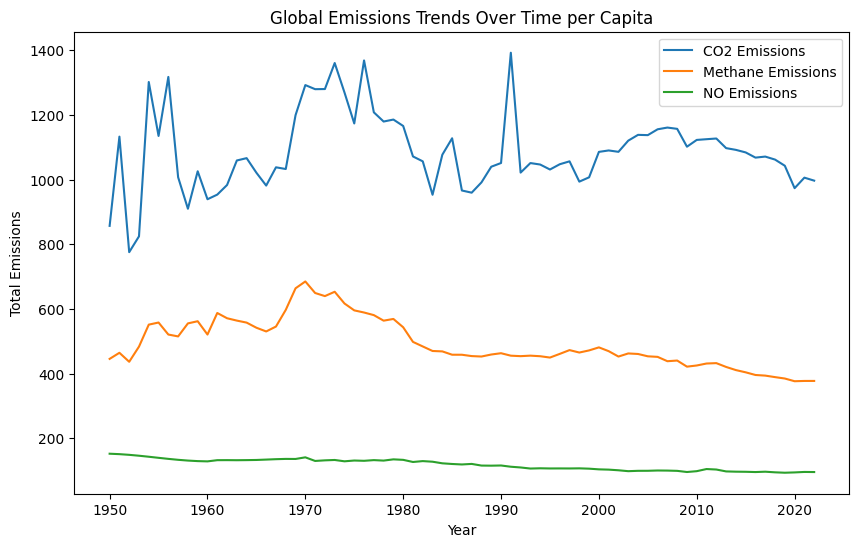

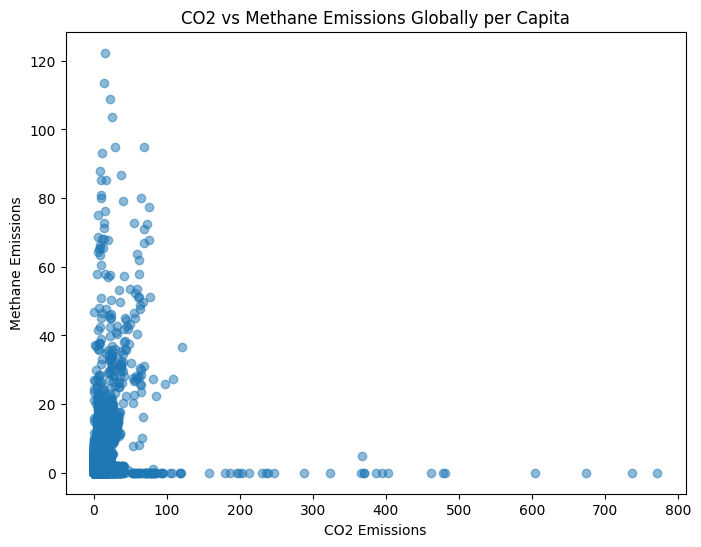

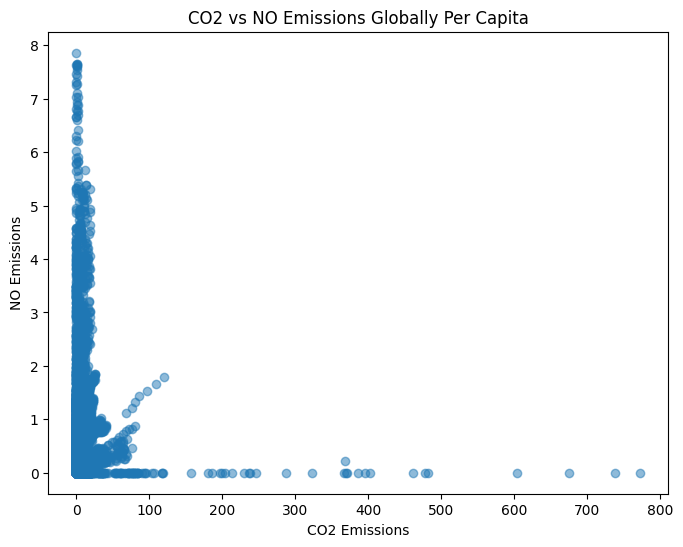

In [43]:
global_trends = emissions_data_filtered.groupby('Year')[['CO2_Emissions', 'Methane_Emissions', 'NO_Emissions']].sum()

# Plotting global emissions trends for each gas type
plt.figure(figsize=(10, 6))
plt.plot(global_trends.index, global_trends['CO2_Emissions'], label='CO2 Emissions')
plt.plot(global_trends.index, global_trends['Methane_Emissions'], label='Methane Emissions')
plt.plot(global_trends.index, global_trends['NO_Emissions'], label='NO Emissions')
plt.title("Global Emissions Trends Over Time per Capita")
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend()
plt.show()

# CO2 vs Methane Emissions
plt.figure(figsize=(8, 6))
plt.scatter(emissions_data_filtered['CO2_Emissions'], emissions_data_filtered['Methane_Emissions'], alpha=0.5)
plt.title("CO2 vs Methane Emissions Globally per Capita")
plt.xlabel("CO2 Emissions")
plt.ylabel("Methane Emissions")
plt.show()

# CO2 vs NO Emissions
plt.figure(figsize=(8, 6))
plt.scatter(emissions_data_filtered['CO2_Emissions'], emissions_data_filtered['NO_Emissions'], alpha=0.5)
plt.title("CO2 vs NO Emissions Globally Per Capita")
plt.xlabel("CO2 Emissions")
plt.ylabel("NO Emissions")
plt.show()

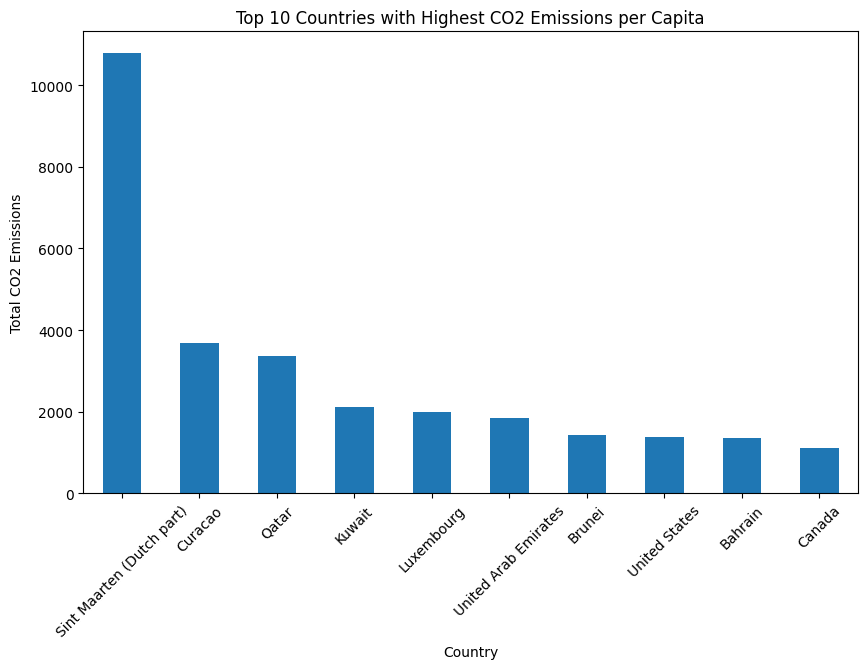

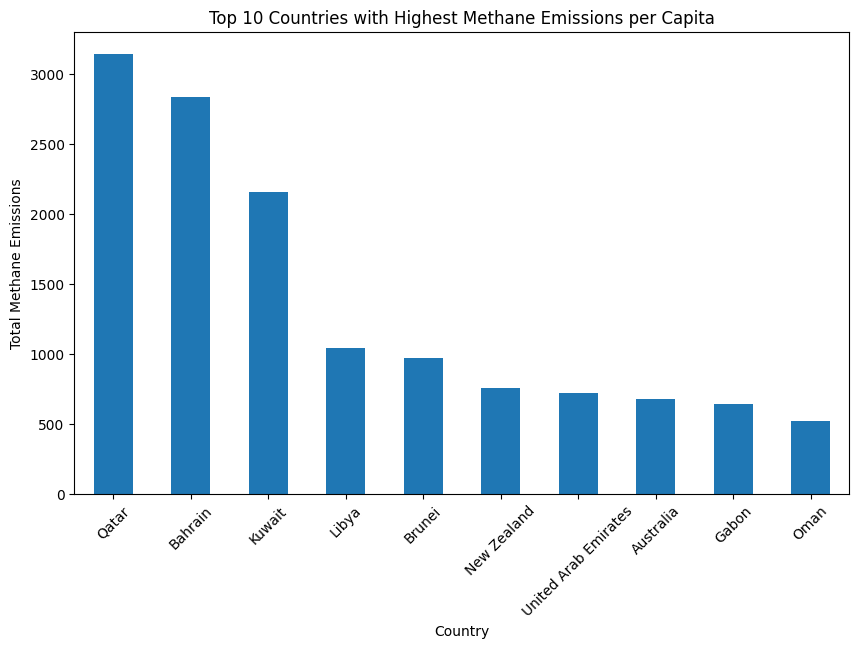

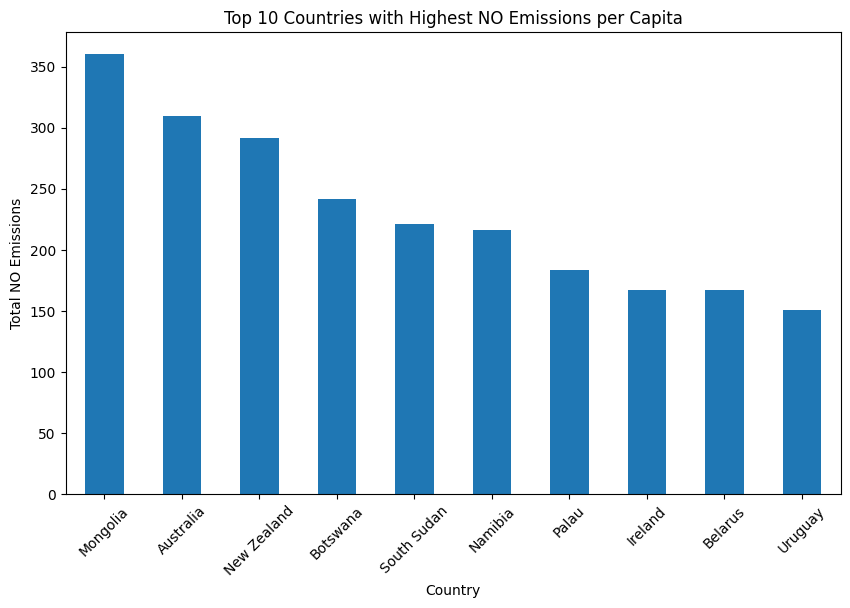

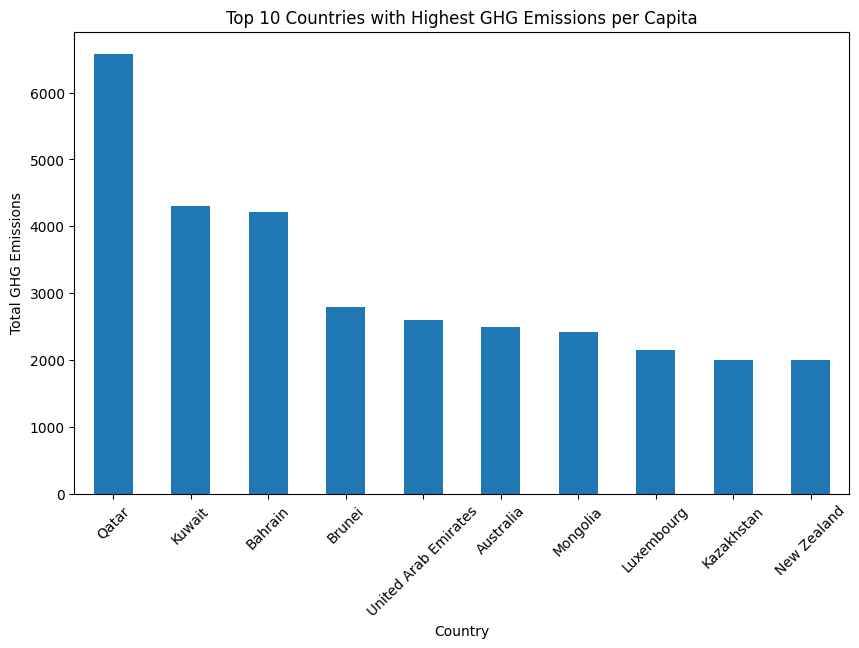

In [44]:
country_emissions = emissions_data_filtered.groupby('Country')[['CO2_Emissions', 'Methane_Emissions', 'NO_Emissions', 'GHG_Emissions']].sum()

# Identify the top 10 countries with the highest emissions for each emission type
top_co2_emitters = country_emissions['CO2_Emissions'].nlargest(10)
top_methane_emitters = country_emissions['Methane_Emissions'].nlargest(10)
top_no_emitters = country_emissions['NO_Emissions'].nlargest(10)
top_ghg_emitters = country_emissions['GHG_Emissions'].nlargest(10)

# CO2 Emissions
plt.figure(figsize=(10, 6))
top_co2_emitters.plot(kind='bar')
plt.title("Top 10 Countries with Highest CO2 Emissions per Capita")
plt.xlabel("Country")
plt.ylabel("Total CO2 Emissions")
plt.xticks(rotation=45)
plt.show()

# Methane Emissions
plt.figure(figsize=(10, 6))
top_methane_emitters.plot(kind='bar')
plt.title("Top 10 Countries with Highest Methane Emissions per Capita")
plt.xlabel("Country")
plt.ylabel("Total Methane Emissions")
plt.xticks(rotation=45)
plt.show()

# NO Emissions
plt.figure(figsize=(10, 6))
top_no_emitters.plot(kind='bar')
plt.title("Top 10 Countries with Highest NO Emissions per Capita")
plt.xlabel("Country")
plt.ylabel("Total NO Emissions")
plt.xticks(rotation=45)
plt.show()

# GHG Emissions
plt.figure(figsize=(10, 6))
top_ghg_emitters.plot(kind='bar')
plt.title("Top 10 Countries with Highest GHG Emissions per Capita")
plt.xlabel("Country")
plt.ylabel("Total GHG Emissions")
plt.xticks(rotation=45)
plt.show()


In [45]:
emissions_data_filtered.to_csv("EmissionsAFinalFix.csv", index=False)

### <center>Citations & References</center> ###

<center>Global Carbon Budget (2023); Population based on various sources (2023) – with major processing by Our World in Data. “Annual CO₂ emissions (per capita) – GCB” [dataset]. Global Carbon Project, “Global Carbon Budget”; Various sources, “Population” [original data].</center> 
<br><br>
<center>Jones et al. (2024); Population based on various sources (2023) – with major processing by Our World in Data. “Per-capita greenhouse gas emissions” [dataset]. Jones et al., “National contributions to climate change 2024.1”; Various sources, “Population” [original data].</center>
<br><br>
<center>Jones et al. (2024); Population based on various sources (2023) – with major processing by Our World in Data. “Per-capita methane emissions” [dataset]. Jones et al., “National contributions to climate change 2024.1”; Various sources, “Population” [original data].</center>
<br><br>
<center>Jones et al. (2024); Population based on various sources (2023) – with major processing by Our World in Data. “Per-capita nitrous oxide emissions” [dataset]. Jones et al., “National contributions to climate change 2024.1”; Various sources, “Population” [original data].</center>
<br><br>
<center>Jones et al. (2024) – with major processing by Our World in Data. “Change in global mean surface temperature caused by greenhouse gas emissions from fossil fuels and industry” [dataset]. Jones et al., “National contributions to climate change 2024.1” [original data].</center>
<br><br>
<center>Global Carbon Budget (2023) – with major processing by Our World in Data. “Annual CO₂ emissions – GCB” [dataset]. Global Carbon Project, “Global Carbon Budget” [original data].</center>
<br><br>
<center>United States Department for Agriculture (USDA) Economic Research Service – processed by Our World in Data. “Agricultural output” [dataset]. United States Department for Agriculture (USDA) Economic Research Service [original data].</center>
<br><br>
<center>HYDE (2023) – with minor processing by Our World in Data. “Built-up Area” [dataset]. PBL Netherlands Environmental Assessment Agency, “History Database of the Global Environment 3.3” [original data].</center>
<br><br>
<center>HYDE (2023) – with minor processing by Our World in Data. “Land use: Agriculture” [dataset]. PBL Netherlands Environmental Assessment Agency, “History Database of the Global Environment 3.3” [original data].</center>
<br><br>
<center>HYDE (2023) – with minor processing by Our World in Data. “Land use: Cropland” [dataset]. PBL Netherlands Environmental Assessment Agency, “History Database of the Global Environment 3.3” [original data].</center>
<br><br>
<center>HYDE (2023) – with minor processing by Our World in Data. “Land use: Grazingland” [dataset]. PBL Netherlands Environmental Assessment Agency, “History Database of the Global Environment 3.3” [original data].</center>
<br><br>
<center>**Contains modified Copernicus Climate Change Service information (2019) – with major processing by Our World in Data. “Temperature anomaly” [dataset]. Contains modified Copernicus Climate Change Service information, “ERA5 monthly averaged data on single levels from 1940 to present 2” [original data].**</center>
<br><br>
<center>**Jones et al. (2024) – with major processing by Our World in Data. “Change in global mean surface temperature caused by CO₂ emissions from agriculture and land use” [dataset]. Jones et al., “National contributions to climate change 2024.1” [original data].**</center>
<br><br>
<center>World Bank (2024) – with major processing by Our World in Data. “Number of high-income countries” [dataset]. World Bank, “Income Classifications” [original data].</center>
<br><br>
<center>Feenstra et al. (2015), Penn World Table (2021) – with major processing by Our World in Data. “GDP per capita – Penn World Table” [dataset]. Feenstra et al. (2015), Penn World Table (2021), “Penn World Table” [original data].</center>
<br><br>
<center>Feenstra et al. (2015), Penn World Table (2021) – with major processing by Our World in Data. “GDP” [dataset]. Feenstra et al. (2015), Penn World Table (2021), “Penn World Table” [original data].**</center> 
<br><br>
<center>World Bank (2023) – with minor processing by Our World in Data. “Gross domestic product (GDP) – World Bank” [dataset]. World Bank, “World Bank World Development Indicators” [original data].</center>
<br><br>
<center>World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data].</center>
<br><br>
<center>Bolt and van Zanden - Maddison Project Database 2023 – with minor processing by Our World in Data. “GDP per capita – Maddison Project Database – Historical data” [dataset]. Bolt and van Zanden, “Maddison Project Database 2023” [original data].</center>
<br><br>
<center>UN, World Population Prospects (2024) – processed by Our World in Data. “Population, total
 – UN WPP” [dataset]. United Nations, “World Population Prospects” [original data].</center>
<br><br>
<center></center>
<br><br>
<center></center>
<br><br>
<center></center>
<br><br>
<center></center>
<br><br>
<center></center>
<br><br>